# UCI ML Myocardial Infarction Complications Dataset - Deep Learning Model

https://archive.ics.uci.edu/ml/datasets/Myocardial+infarction+complications#

Wikipedia page describing Myocardial infarction

https://en.wikipedia.org/wiki/Myocardial_infarction

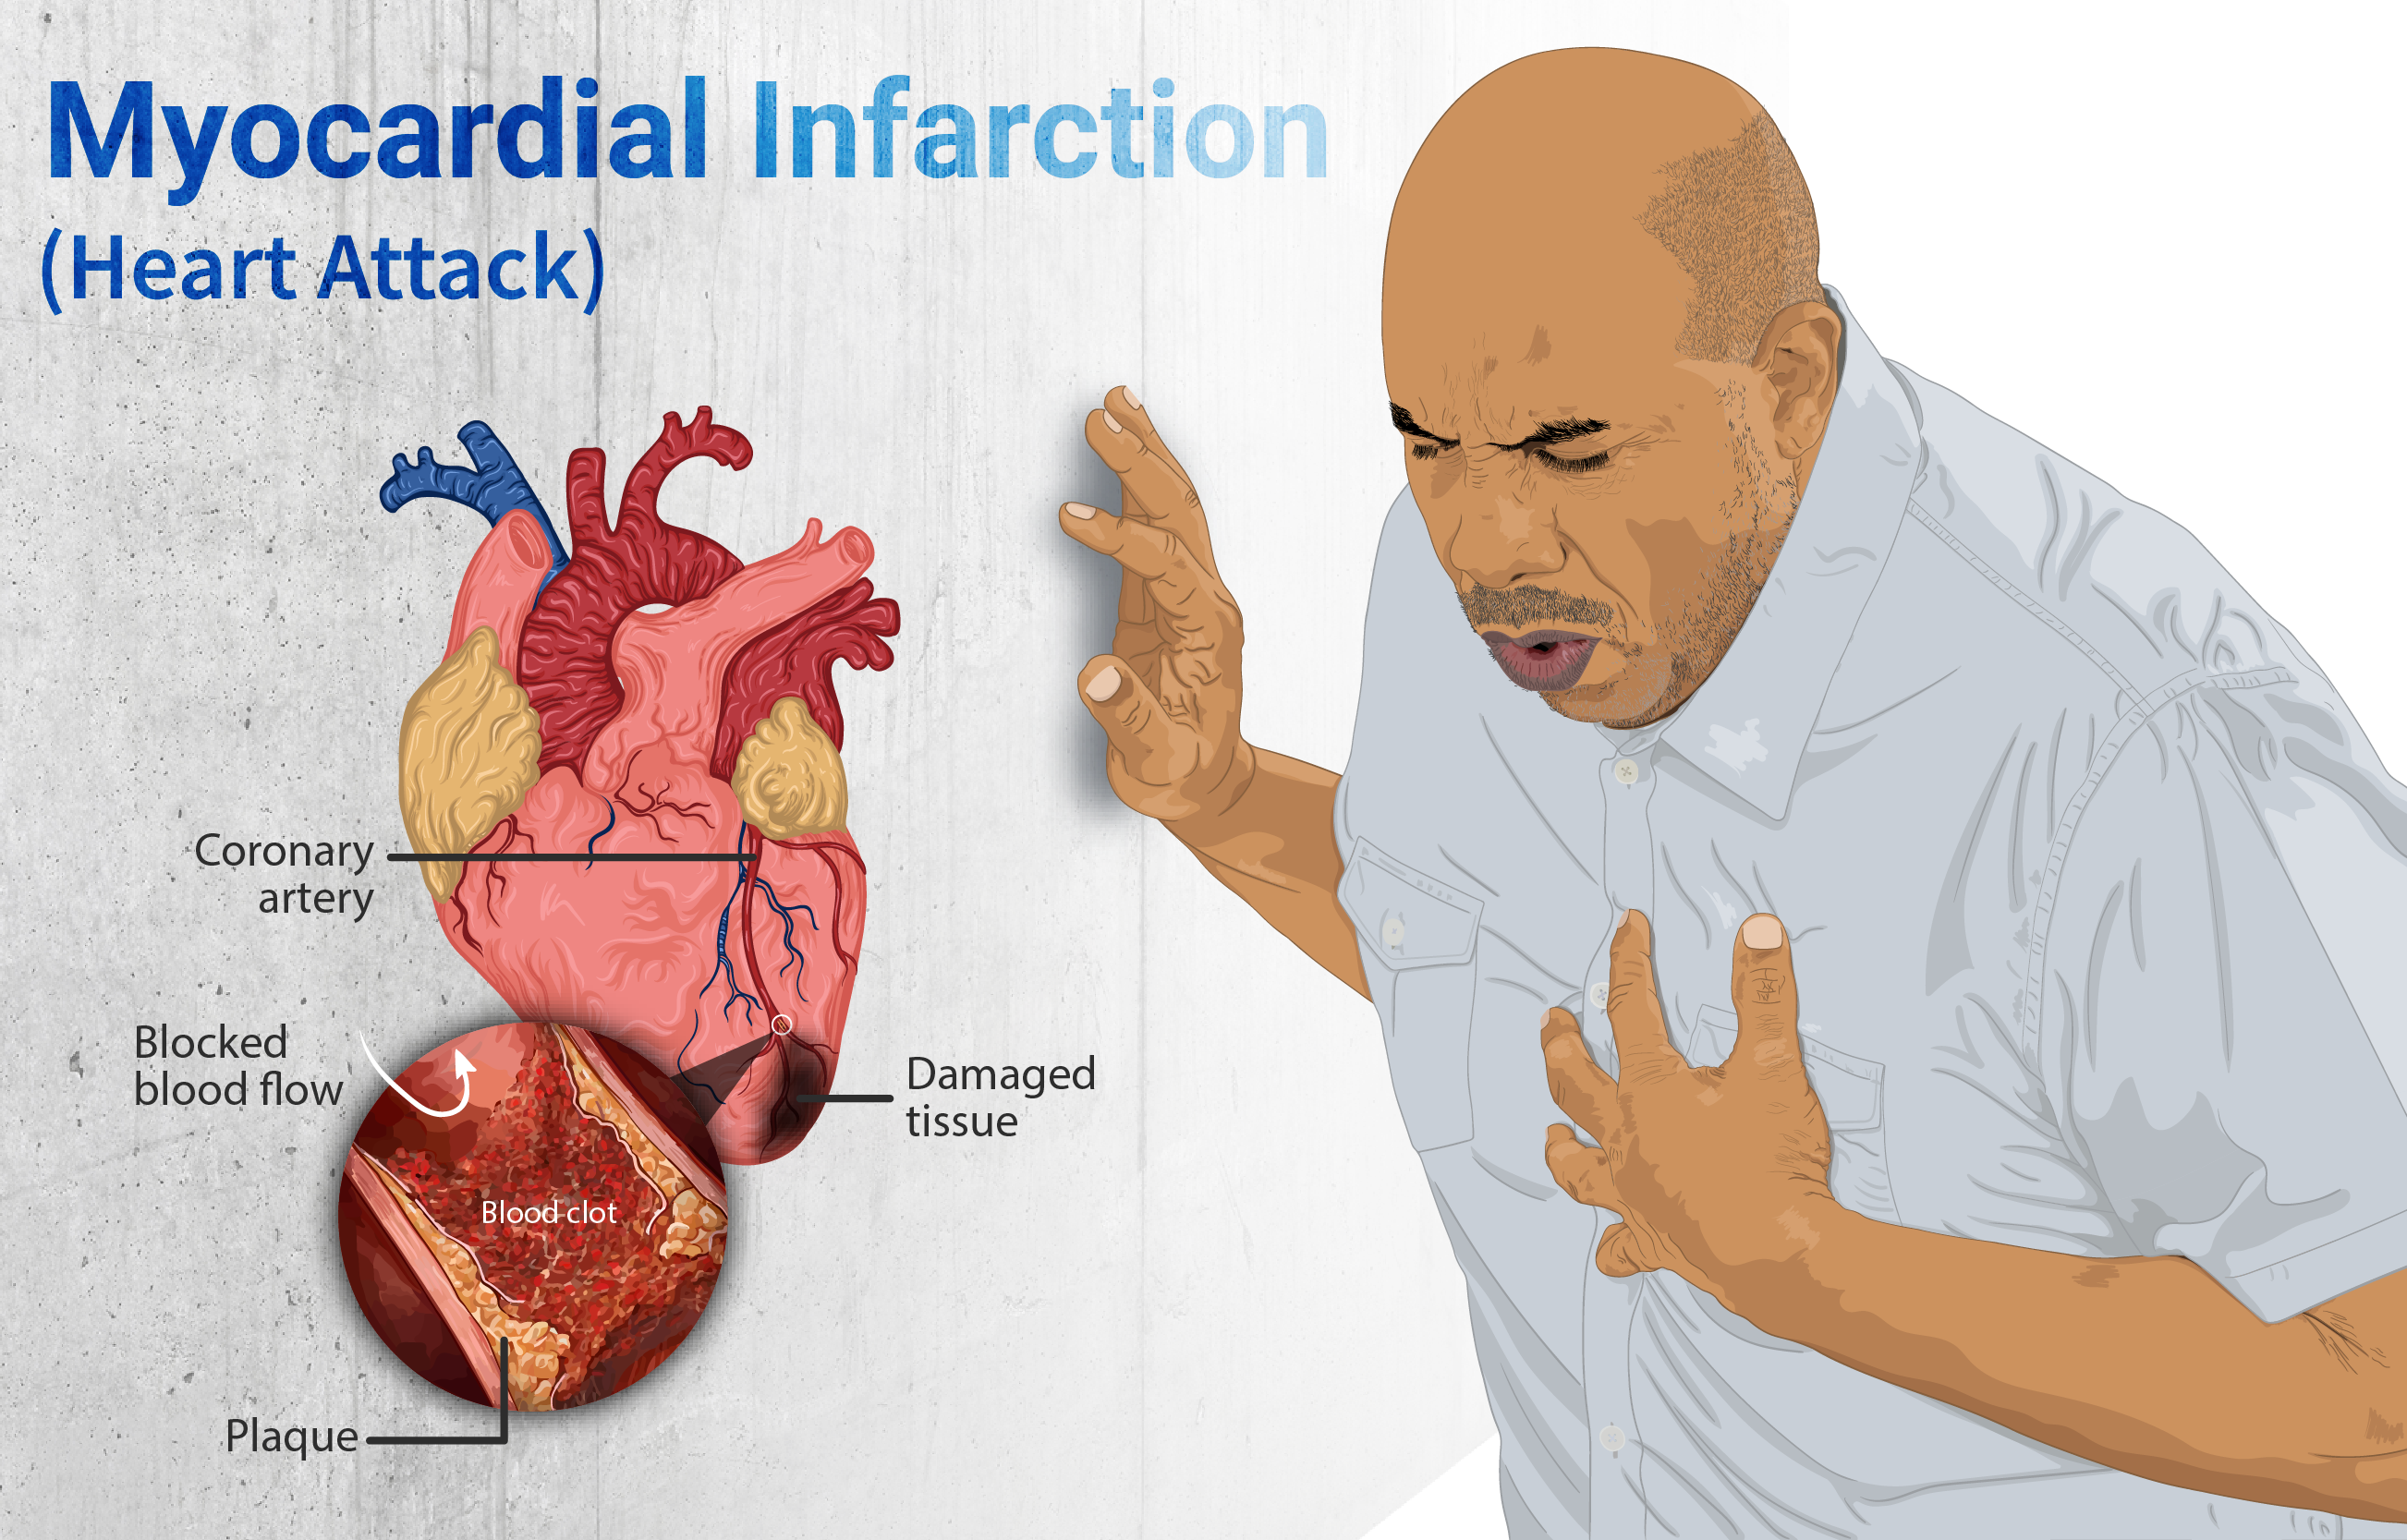

In [1]:
from IPython.display import Image
dirpath = r'C:\Users\joeba\OneDrive\Documents\ML\Myocardial infarction complications'
Image(dirpath + '/Depiction_of_a_person_suffering_from_a_heart_attack_(Myocardial_Infarction).png')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense

from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import regularizers

from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Using TensorFlow backend.


In [3]:
cols = ['Record ID (ID)',
 'Age (AGE)',
 'Gender (SEX)',
 'Quantity of myocardial infarctions in the anamnesis (INF_ANAM)',
 'Exertional angina pectoris in the anamnesis (STENOK_AN)',
 'Functional class (FC) of angina pectoris in the last year (FK_STENOK)',
 'Coronary heart disease (CHD) in recent weeks',
 'Heredity on CHD (IBS_NASL)',
 'Presence of an essential hypertension (GB)',
 'Symptomatic hypertension (SIM_GIPERT)',
 'Duration of arterial hypertension (DLIT_AG)',
 'Presence of chronic Heart failure (HF) in the anamnesis (ZSN_A)',
 'Observing of arrhythmia in the anamnesis (nr11)',
 'Premature atrial contractions in the anamnesis (nr01)',
 'Premature ventricular contractions in the anamnesis (nr02)',
 'Paroxysms of atrial fibrillation in the anamnesis (nr03)',
 'A persistent form of atrial fibrillation in the anamnesis (nr04)',
 'Ventricular fibrillation in the anamnesis (nr07)',
 'Ventricular paroxysmal tachycardia in the anamnesis (nr08)',
 'First-degree AV block in the anamnesis (np01)',
 'Third-degree AV block in the anamnesis (np04)',
 'LBBB (anterior branch) in the anamnesis (np05)',
 'Incomplete LBBB in the anamnesis (np07)',
 'Complete LBBB in the anamnesis (np08)',
 'Incomplete RBBB in the anamnesis (np09)',
 'Complete RBBB in the anamnesis (np10)',
 'Diabetes mellitus in the anamnesis (endocr_01)',
 'Obesity in the anamnesis (endocr_02)',
 'Thyrotoxicosis in the anamnesis (endocr_03)',
 'Chronic bronchitis in the anamnesis (zab_leg_01)',
 'chronic bronchitis in the anamnesis (zab_leg_02)',
 'Bronchial asthma in the anamnesis (zab_leg_03)',
 'Chronic pneumonia in the anamnesis (zab_leg_04)',
 'Pulmonary tuberculosis in the anamnesis (zab_leg_06)',
 'Systolic blood pressure according to Emergency Cardiology Team (S_AD_KBRIG) (mmHg)',
 'Diastolic blood pressure according to Emergency Cardiology Team (D_AD_KBRIG) (mmHg)',
 'Systolic blood pressure according to intensive care unit (S_AD_ORIT) (mmHg)',
 'Diastolic blood pressure according to intensive care unit (D_AD_ORIT) (mmHg)',
 'Pulmonary edema at the time of admission to intensive care unit (O_L_POST)',
 'Cardiogenic shock at the time of admission to intensive care unit (K_SH_POST)',
 'Paroxysms of atrial fibrillation at the time of admission to intensive care unit',
 'Paroxysms of supraventricular tachycardia at the time of admission to intensive care unit',
 'Paroxysms of ventricular tachycardia at the time of admission to intensive care unit',
 'Ventricular fibrillation at the time of admission to intensive care unit',
 'Presence of an anterior myocardial infarction (left ventricular) (ECG changes in leads V1: V4 ) (ant_im)',
 'Presence of a lateral myocardial infarction (left ventricular) (ECG changes in leads V5: V6 ',
 'Presence of an inferior myocardial infarction (left ventricular) (ECG changes in leads III',
 'Presence of a posterior myocardial infarction (left ventricular) (ECG changes in V7: V9',
 'Presence of a right ventricular myocardial infarction (IM_PG_P)',
 'ECG rhythm at the time of admission to hospital: sinus (with a heart rate 60-90) (ritm_ecg_p_01)',
 'ECG rhythm at the time of admission to hospital: atrial fibrillation (ritm_ecg_p_02)',
 'ECG rhythm at the time of admission to hospital: atrial (ritm_ecg_p_04)',
 'ECG rhythm at the time of admission to hospital: idioventricular (ritm_ecg_p_06)',
 'ECG rhythm at the time of admission to hospital: sinus with a heart rate above 90 (tachycardia) (ritm_ecg_p_07)',
 'ECG rhythm at the time of admission to hospital: sinus with a heart rate below 60 (bradycardia) (ritm_ecg_p_08)',
 'Premature atrial contractions on ECG at the time of admission to hospital (n_r_ecg_p_01)',
 'Frequent premature atrial contractions on ECG at the time of admission to hospital (n_r_ecg_p_02)',
 'ventricular contractions on ECG at the time of admission to hospital (n_r_ecg_p_03)',
 'Frequent premature ventricular contractions on ECG at the time of admission to hospital (n_r_ecg_p_04)',
 'Paroxysms of atrial fibrillation on ECG at the time of admission to hospital (n_r_ecg_p_05)',
 'Persistent form of atrial fibrillation on ECG at the time of admission to hospital (n_r_ecg_p_06)',
 'Paroxysms of supraventricular tachycardia on ECG at the time of admission to hospital (n_r_ecg_p_08)',
 'Paroxysms of ventricular tachycardia on ECG at the time of admission to hospital (n_r_ecg_p_09)',
 'Ventricular fibrillation on ECG at the time of admission to hospital (n_r_ecg_p_10)',
 'Sinoatrial block on ECG at the time of admission to hospital (n_p_ecg_p_01)',
 'First-degree AV block on ECG at the time of admission to hospital (n_p_ecg_p_03)',
 'Type 1 Second-degree AV block (Mobitz I/Wenckebach) on ECG at the time of admission to hospital (n_p_ecg_p_04)',
 'Type 2 Second-degree AV block (Mobitz II/Hay) on ECG at the time of admission to hospital (n_p_ecg_p_05)',
 'Third-degree AV block on ECG at the time of admission to hospital (n_p_ecg_p_06)',
 'LBBB (anterior branch) on ECG at the time of admission to hospital (n_p_ecg_p_07)',
 'LBBB (posterior branch) on ECG at the time of admission to hospital (n_p_ecg_p_08)',
 'Incomplete LBBB on ECG at the time of admission to hospital (n_p_ecg_p_09)',
 'Complete LBBB on ECG at the time of admission to hospital (n_p_ecg_p_10)',
 'Incomplete RBBB on ECG at the time of admission to hospital (n_p_ecg_p_11)',
 'Complete RBBB on ECG at the time of admission to hospital (n_p_ecg_p_12)',
 'Fibrinolytic therapy by Ð¡Ðµliasum 750k IU (fibr_ter_01)',
 'Fibrinolytic therapy by Ð¡Ðµliasum 1m IU (fibr_ter_02)',
 'Fibrinolytic therapy by Ð¡Ðµliasum 3m IU (fibr_ter_03)',
 'Fibrinolytic therapy by Streptase (fibr_ter_05)',
 'Fibrinolytic therapy by Ð¡Ðµliasum 500k IU (fibr_ter_06)',
 'Fibrinolytic therapy by Ð¡Ðµliasum 250k IU (fibr_ter_07)',
 'Fibrinolytic therapy by Streptodecase 1.5m IU (fibr_ter_08)',
 'Hypokalemia ( < 4 mmol/L) (GIPO_K)',
 'Serum potassium content (K_BLOOD) (mmol/L)',
 'Increase of sodium in serum (more than 150 mmol/L) (GIPER_Na)',
 'Serum sodium content (Na_BLOOD) (mmol/L)',
 'Serum AlAT content (ALT_BLOOD) (IU/L)',
 'Serum AsAT content (AST_BLOOD) (IU/L)',
 'Serum CPK content (KFK_BLOOD) (IU/L)',
 'White blood cell count (billions per liter) (L_BLOOD)',
 'ESR (Erythrocyte sedimentation rate) (ROE) (Ð¼Ð¼)',
 'Time elapsed from the beginning of the attack of CHD to the hospital (TIME_B_S)',
 'Relapse of the pain in the first hours of the hospital period (R_AB_1_n)',
 'Relapse of the pain in the second day of the hospital period (R_AB_2_n)',
 'Relapse of the pain in the third day of the hospital period (R_AB_3_n)',
 'Use of opioid drugs by the Emergency Cardiology Team (NA_KB)',
 'Use of NSAIDs by the Emergency Cardiology Team (NOT_NA_KB)',
 'of lidocaine by the Emergency Cardiology Team (LID_KB)',
 'Use of liquid nitrates in the ICU (NITR_S)',
 'Use of opioid drugs in the ICU in the first hours of the hospital period (NA_R_1_n)',
 'Use of opioid drugs in the ICU in the second day of the hospital period (NA_R_2_n)',
 'Use of opioid drugs in the ICU in the third day of the hospital period (NA_R_3_n)',
 'Use of NSAIDs in the ICU in the first hours of the hospital period (NOT_NA_1_n)',
 'Use of NSAIDs in the ICU in the second day of the hospital period (NOT_NA_2_n)',
 'Use of NSAIDs in the ICU in the third day of the hospital period (NOT_NA_3_n)',
 'Use of lidocaine in the ICU (LID_S_n)',
 'Use of beta-blockers in the ICU (B_BLOK_S_n)',
 'Use of calcium channel blockers in the ICU (ANT_CA_S_n)',
 'Use of Ð° anticoagulants (heparin) in the ICU (GEPAR_S_n)',
 'Use of acetylsalicylic acid in the ICU (ASP_S_n)',
 'Use of Ticlid in the ICU (TIKL_S_n)',
 'Use of Trental in the ICU (TRENT_S_n)',
 'Atrial fibrillation (FIBR_PREDS)',
 'Supraventricular tachycardia (PREDS_TAH)',
 'Ventricular tachycardia (JELUD_TAH)',
 'Ventricular fibrillation (FIBR_JELUD)',
 'Third-degree AV block (A_V_BLOK)',
 'Pulmonary edema (OTEK_LANC)',
 'Myocardial rupture (RAZRIV)',
 'Dressler syndrome (DRESSLER)',
 'Chronic heart failure (ZSN)',
 'Relapse of the myocardial infarction (REC_IM)',
 'Post-infarction angina (P_IM_STEN)',
 'Lethal outcome (cause) (LET_IS)']

In [48]:
# get data
wifi = 'offline' # online or offline

if wifi == 'online':
    # after doing datacamp intermediate importing data in python
    url = 'https://archive.ics.uci.edu/ml/datasets/Myocardial+infarction+complications/MI.data'
    df = pd.read_csv(url, header=None)

else:
    df = pd.read_csv(dirpath+'/MI.data', header=None)
    
df = df.replace(to_replace='?', value=np.NaN)

df.columns = cols

df.head()

,Record ID (ID),Age (AGE),Gender (SEX),Quantity of myocardial infarctions in the anamnesis (INF_ANAM),Exertional angina pectoris in the anamnesis (STENOK_AN),Functional class (FC) of angina pectoris in the last year (FK_STENOK),Coronary heart disease (CHD) in recent weeks,Heredity on CHD (IBS_NASL),Presence of an essential hypertension (GB),Symptomatic hypertension (SIM_GIPERT),...,Ventricular tachycardia (JELUD_TAH),Ventricular fibrillation (FIBR_JELUD),Third-degree AV block (A_V_BLOK),Pulmonary edema (OTEK_LANC),Myocardial rupture (RAZRIV),Dressler syndrome (DRESSLER),Chronic heart failure (ZSN),Relapse of the myocardial infarction (REC_IM),Post-infarction angina (P_IM_STEN),Lethal outcome (cause) (LET_IS)
0,1,77,1,2,1,1,2,NaN,3,0,...,0,0,0,0,0,0,0,0,0,0
1,2,55,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,52,1,0,0,0,2,NaN,2,0,...,0,0,0,0,0,0,0,0,0,0
3,4,68,0,0,0,0,2,NaN,2,0,...,0,0,0,0,0,0,1,0,0,0
4,5,60,1,0,0,0,2,NaN,3,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df.sample(3)

,Record ID (ID),Age (AGE),Gender (SEX),Quantity of myocardial infarctions in the anamnesis (INF_ANAM),Exertional angina pectoris in the anamnesis (STENOK_AN),Functional class (FC) of angina pectoris in the last year (FK_STENOK),Coronary heart disease (CHD) in recent weeks,Heredity on CHD (IBS_NASL),Presence of an essential hypertension (GB),Symptomatic hypertension (SIM_GIPERT),...,Ventricular tachycardia (JELUD_TAH),Ventricular fibrillation (FIBR_JELUD),Third-degree AV block (A_V_BLOK),Pulmonary edema (OTEK_LANC),Myocardial rupture (RAZRIV),Dressler syndrome (DRESSLER),Chronic heart failure (ZSN),Relapse of the myocardial infarction (REC_IM),Post-infarction angina (P_IM_STEN),Lethal outcome (cause) (LET_IS)
1367,1368,66,1,1,3,2,1,NaN,0,1,...,0,0,0,0,0,0,1,0,0,0
999,1000,64,1,1,6,2,2,NaN,2,0,...,0,0,0,0,0,0,0,0,0,0
200,201,71,1,0,0,0,2,NaN,2,0,...,0,0,0,0,0,0,1,0,0,0


In [50]:
df.describe()

,Record ID (ID),Gender (SEX),Atrial fibrillation (FIBR_PREDS),Supraventricular tachycardia (PREDS_TAH),Ventricular tachycardia (JELUD_TAH),Ventricular fibrillation (FIBR_JELUD),Third-degree AV block (A_V_BLOK),Pulmonary edema (OTEK_LANC),Myocardial rupture (RAZRIV),Dressler syndrome (DRESSLER),Chronic heart failure (ZSN),Relapse of the myocardial infarction (REC_IM),Post-infarction angina (P_IM_STEN),Lethal outcome (cause) (LET_IS)
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,850.500000,0.626471,0.100000,0.011765,0.024706,0.041765,0.033529,0.093529,0.031765,0.044118,0.231765,0.093529,0.087059,0.477059
std,490.892045,0.483883,0.300088,0.107857,0.155273,0.200110,0.180067,0.291259,0.175425,0.205417,0.422084,0.291259,0.282004,1.381818
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,425.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,850.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1275.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1700.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [51]:
list(df.columns)

['Record ID (ID)',
 'Age (AGE)',
 'Gender (SEX)',
 'Quantity of myocardial infarctions in the anamnesis (INF_ANAM)',
 'Exertional angina pectoris in the anamnesis (STENOK_AN)',
 'Functional class (FC) of angina pectoris in the last year (FK_STENOK)',
 'Coronary heart disease (CHD) in recent weeks',
 'Heredity on CHD (IBS_NASL)',
 'Presence of an essential hypertension (GB)',
 'Symptomatic hypertension (SIM_GIPERT)',
 'Duration of arterial hypertension (DLIT_AG)',
 'Presence of chronic Heart failure (HF) in the anamnesis (ZSN_A)',
 'Observing of arrhythmia in the anamnesis (nr11)',
 'Premature atrial contractions in the anamnesis (nr01)',
 'Premature ventricular contractions in the anamnesis (nr02)',
 'Paroxysms of atrial fibrillation in the anamnesis (nr03)',
 'A persistent form of atrial fibrillation in the anamnesis (nr04)',
 'Ventricular fibrillation in the anamnesis (nr07)',
 'Ventricular paroxysmal tachycardia in the anamnesis (nr08)',
 'First-degree AV block in the anamnesis (np0

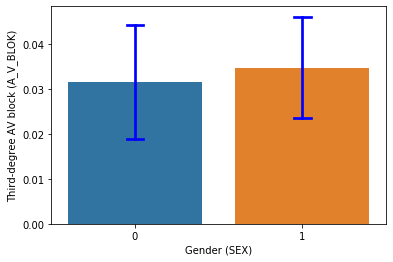

In [52]:
fig, ax = plt.subplots()

#ax.bar(df['Gender (SEX)'], df['Chronic heart failure (ZSN)']);


ax = sns.barplot(x='Gender (SEX)', y='Third-degree AV block (A_V_BLOK)', errcolor='b', capsize=0.1, data=df)

In [53]:
df['Quantity of myocardial infarctions in the anamnesis (INF_ANAM)'].value_counts()

0    1060
1     410
2     147
3      79
Name: Quantity of myocardial infarctions in the anamnesis (INF_ANAM), dtype: int64

In [54]:
np.sum(df['Quantity of myocardial infarctions in the anamnesis (INF_ANAM)'].isna())

4

In [55]:
missing = pd.DataFrame()
for c in cols:
    missing = missing.append(
        {'Count':np.sum(df[c].isna()), 'pc':round(np.sum(df[c].isna()) / len(df)*100,2), 'Item':c}, ignore_index=True)
    
missing

,Count,Item,pc
0,0.0,Record ID (ID),0.00
1,8.0,Age (AGE),0.47
2,0.0,Gender (SEX),0.00
3,4.0,Quantity of myocardial infarctions in the anam...,0.24
4,106.0,Exertional angina pectoris in the anamnesis (S...,6.24
...,...,...,...
119,0.0,Dressler syndrome (DRESSLER),0.00
120,0.0,Chronic heart failure (ZSN),0.00
121,0.0,Relapse of the myocardial infarction (REC_IM),0.00
122,0.0,Post-infarction angina (P_IM_STEN),0.00


In [56]:
missing.sort_values('pc', ascending=False, inplace=True)

missing

,Count,Item,pc
88,1696.0,Serum CPK content (KFK_BLOOD) (IU/L),99.76
7,1628.0,Heredity on CHD (IBS_NASL),95.76
34,1076.0,Systolic blood pressure according to Emergency...,63.29
35,1076.0,Diastolic blood pressure according to Emergenc...,63.29
96,686.0,Use of NSAIDs by the Emergency Cardiology Team...,40.35
...,...,...,...
114,0.0,Ventricular tachycardia (JELUD_TAH),0.00
113,0.0,Supraventricular tachycardia (PREDS_TAH),0.00
112,0.0,Atrial fibrillation (FIBR_PREDS),0.00
2,0.0,Gender (SEX),0.00


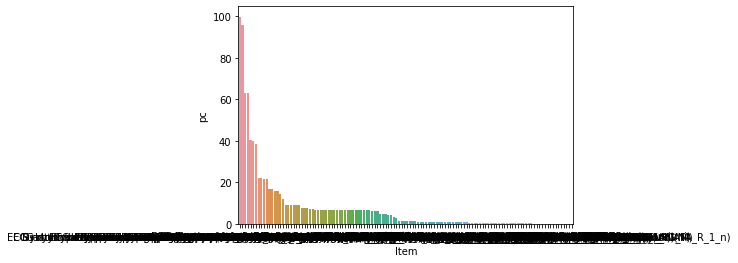

In [57]:
fig, ax = plt.subplots()
ax = sns.barplot(x='Item', y='pc', data=missing)

In [58]:
df = df.drop(columns=['Record ID (ID)', 'Serum CPK content (KFK_BLOOD) (IU/L)', 'Heredity on CHD (IBS_NASL)'])


In [60]:
list(df.columns)

['Age (AGE)',
 'Gender (SEX)',
 'Quantity of myocardial infarctions in the anamnesis (INF_ANAM)',
 'Exertional angina pectoris in the anamnesis (STENOK_AN)',
 'Functional class (FC) of angina pectoris in the last year (FK_STENOK)',
 'Coronary heart disease (CHD) in recent weeks',
 'Presence of an essential hypertension (GB)',
 'Symptomatic hypertension (SIM_GIPERT)',
 'Duration of arterial hypertension (DLIT_AG)',
 'Presence of chronic Heart failure (HF) in the anamnesis (ZSN_A)',
 'Observing of arrhythmia in the anamnesis (nr11)',
 'Premature atrial contractions in the anamnesis (nr01)',
 'Premature ventricular contractions in the anamnesis (nr02)',
 'Paroxysms of atrial fibrillation in the anamnesis (nr03)',
 'A persistent form of atrial fibrillation in the anamnesis (nr04)',
 'Ventricular fibrillation in the anamnesis (nr07)',
 'Ventricular paroxysmal tachycardia in the anamnesis (nr08)',
 'First-degree AV block in the anamnesis (np01)',
 'Third-degree AV block in the anamnesis (np0